#### Analisis estadistico de datos  para determinar  las  variables,  llenado de vacios y preprocesamiento de las dimensiones  para el  algoritmo de clasificacion 

El proposito de nuestro trabajo es usar los datos del SIE y tulizar los indicadores ( series de tiempo) de los  19 paises y clasificar los paises  FLAR y no FLAR ( es decir paises que son miembros o asociados  y sus vecinos) 

esto permitira al Fondo aunar esfuerzo en mercadeo y oferta de valor a esos vecinos y priorizar

In [1]:
import pandas as pd

#Hacemos esto para ignorar varias advertencias específicas de Pandas
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Importar el conjunto de datos raw
rawdata = pd.read_csv('../data/sie_data_raw.csv',sep=';')
rawdata.head()

,serieID,refAreaID,refAreaName,indicatorID,indicatorNameEN,indicatorNameES,indicatorNameENShort,indicatorNameESShort,dataDomainID,categoryID,...,unitName,unitMultID,unitMultValue,timeFormatID,MIEMBRO_FLAR,timeFormatName,timePeriod,Fecha_Estructurada,obsValue,obsValue_real
0,EC-NGDP_PA_XDC-Q,EC,Ecuador,NGDP_PA_XDC,"National Accounts, Gross Domestic Product, Pro...","pib nominal, moneda nacional","Nominal Gross Domestic Product, National Currency","Producto interno bruto (PIB) nominal, moneda n...",NAG,1,...,US dollar,6,Millions,P3M,1,Quarterly,2000-Q1,2000-03-01,"3819,126",3819126000
1,EC-NGDP_PA_XDC-Q,EC,Ecuador,NGDP_PA_XDC,"National Accounts, Gross Domestic Product, Pro...","pib nominal, moneda nacional","Nominal Gross Domestic Product, National Currency","Producto interno bruto (PIB) nominal, moneda n...",NAG,1,...,US dollar,6,Millions,P3M,1,Quarterly,2000-Q2,2000-06-01,"4402,479",4402479000
2,EC-NGDP_PA_XDC-Q,EC,Ecuador,NGDP_PA_XDC,"National Accounts, Gross Domestic Product, Pro...","pib nominal, moneda nacional","Nominal Gross Domestic Product, National Currency","Producto interno bruto (PIB) nominal, moneda n...",NAG,1,...,US dollar,6,Millions,P3M,1,Quarterly,2000-Q3,2000-09-01,"4906,653",4906653000
3,EC-NGDP_PA_XDC-Q,EC,Ecuador,NGDP_PA_XDC,"National Accounts, Gross Domestic Product, Pro...","pib nominal, moneda nacional","Nominal Gross Domestic Product, National Currency","Producto interno bruto (PIB) nominal, moneda n...",NAG,1,...,US dollar,6,Millions,P3M,1,Quarterly,2000-Q4,2000-12-01,"5190,343",5190343000
4,EC-NGDP_PA_XDC-Q,EC,Ecuador,NGDP_PA_XDC,"National Accounts, Gross Domestic Product, Pro...","pib nominal, moneda nacional","Nominal Gross Domestic Product, National Currency","Producto interno bruto (PIB) nominal, moneda n...",NAG,1,...,US dollar,6,Millions,P3M,1,Quarterly,2001-Q1,2001-03-01,"5904,082",5904082000


In [3]:
rawdata
rawdata.dtypes

serieID                 object
refAreaID               object
refAreaName             object
indicatorID             object
indicatorNameEN         object
indicatorNameES         object
indicatorNameENShort    object
indicatorNameESShort    object
dataDomainID            object
categoryID               int64
freqID                  object
frequencyName           object
unitID                  object
unitName                object
unitMultID               int64
unitMultValue           object
timeFormatID            object
MIEMBRO_FLAR             int64
timeFormatName          object
timePeriod              object
Fecha_Estructurada      object
obsValue                object
obsValue_real           object
dtype: object

In [4]:
# funcion que transforma los datos originales en tipos de datos requeridos
def trx_raw(rdata):
    #Ajuste a los tipos de datos fecha y numero de cada valor observado
    rdata['Fecha_Estructurada'] = pd.to_datetime(rdata['Fecha_Estructurada'], format='%Y-%m-%d')
    rdata['obsValue'] = rdata['obsValue'].str.replace(',', '.', regex=True)
    rdata['obsValue'] = pd.to_numeric(rdata['obsValue'])
    rdata['obsValue_real'] = rdata['obsValue_real'].str.replace(',', '.', regex=True)
    rdata['obsValue_real'] = pd.to_numeric(rawdata['obsValue_real'])
    return  rdata

In [5]:
rawdata=trx_raw(rawdata)
rawdata.dtypes

serieID                         object
refAreaID                       object
refAreaName                     object
indicatorID                     object
indicatorNameEN                 object
indicatorNameES                 object
indicatorNameENShort            object
indicatorNameESShort            object
dataDomainID                    object
categoryID                       int64
freqID                          object
frequencyName                   object
unitID                          object
unitName                        object
unitMultID                       int64
unitMultValue                   object
timeFormatID                    object
MIEMBRO_FLAR                     int64
timeFormatName                  object
timePeriod                      object
Fecha_Estructurada      datetime64[ns]
obsValue                       float64
obsValue_real                  float64
dtype: object

In [6]:
##funcion para  transformar la raw data en dimensiones para la clasificacion
def trx_toclaf(rdata):
    clafdata=rdata.copy()
    clafdata=clafdata[['refAreaID','refAreaName','indicatorID','MIEMBRO_FLAR','Fecha_Estructurada','obsValue_real']]
    clafdata["Indicator-fecha"] = clafdata["indicatorID"] +"_"+ clafdata["Fecha_Estructurada"].astype('str')
    clafdata.drop('indicatorID', axis=1, inplace=True)
    clafdata.drop('Fecha_Estructurada', axis=1, inplace=True)
    clafdata=pd.pivot_table(clafdata, values = 'obsValue_real', index=['refAreaID','refAreaName','MIEMBRO_FLAR'], columns = 'Indicator-fecha').reset_index()
    return clafdata



In [7]:
clafdata=trx_toclaf(rawdata)
clafdata.head()

Indicator-fecha,refAreaID,refAreaName,MIEMBRO_FLAR,BCA_BP6_USD_1980-03-01,BCA_BP6_USD_1980-06-01,BCA_BP6_USD_1980-09-01,BCA_BP6_USD_1980-12-01,BCA_BP6_USD_1981-03-01,BCA_BP6_USD_1981-06-01,BCA_BP6_USD_1981-09-01,...,TXG_FOB_USD_2023-01-01,TXG_FOB_USD_2023-02-01,TXG_FOB_USD_2023-03-01,TXG_FOB_USD_2023-04-01,TXG_FOB_USD_2023-05-01,TXG_FOB_USD_2023-06-01,TXG_FOB_USD_2023-07-01,TXG_FOB_USD_2023-08-01,TXG_FOB_USD_2023-09-01,TXG_FOB_USD_2023-10-01
0,AR,Argentina,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.925331e+09,5.239194e+09,5.734575e+09,5.898250e+09,6.261858e+09,5.414915e+09,6.060343e+09,5.910266e+09,5.751000e+09,NaN
1,BO,Bolivia,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.447497e+08,7.702248e+08,9.948223e+08,9.918004e+08,9.501458e+08,8.898648e+08,NaN,NaN,NaN,NaN
2,BR,Brazil,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.270570e+10,2.102480e+10,3.274670e+10,2.784390e+10,3.254200e+10,2.955240e+10,2.826600e+10,3.119320e+10,2.840630e+10,NaN
3,CL,Chile,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.979753e+09,8.314668e+09,9.813952e+09,7.609448e+09,7.836360e+09,7.939265e+09,7.393661e+09,8.063788e+09,7.341750e+09,7.725718e+09
4,CO,Colombia,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.696200e+09,4.202200e+09,4.431900e+09,3.739200e+09,4.497900e+09,4.021000e+09,4.133900e+09,3.946900e+09,NaN,NaN


In [8]:
#funcion que  elimina las columnas que tengan un  porcentaje de valores nulo mayor a un umbral definido 
def remove_columns_na_p(umbral,df):
    df=df.copy()
    df.drop('refAreaName', axis=1, inplace=True)
    porcentaje_nan = df.isnull().mean()
    # Selecciona las columnas que tienen un porcentaje de NaN menor o igual al umbral
    columnas_a_mantener = porcentaje_nan[porcentaje_nan <= umbral].index    
    # Crea un nuevo DataFrame con las columnas seleccionadas
    df_filtrado = df[columnas_a_mantener]
    return df_filtrado

In [9]:
clafdata_50=remove_columns_na_p(0.5,clafdata)
clafdata_0=remove_columns_na_p(0,clafdata)
clafdata_100=remove_columns_na_p(1,clafdata)

In [10]:
clafdata_50.shape

(19, 3624)

In [11]:
clafdata_0.shape

(19, 121)

In [12]:
clafdata_100.shape

(19, 16726)

aqui finaliza la primera parte de preparar los datos para una posible clasificacion pues cada  fila  corresponde a un pais, y cada columna es la combinacion de  indicador+fecha ( lo que nos da un numero o valor observado) sin embargo, en el siguiente apartado vamos a detallar con mas profundidad cada Pais ( por indicador)  y cada  Indicador ( por paises graficando las series de tiempo) 

In [13]:
#Indicadores de estudio  ( series de tiempo) 
#1.PIB ( Producto interno bruto)  ('NGDP_PA_USD', 'NGDP_PA_XDC')
#2. Inflacion  ('PCPI_IX')
#3. Deficit Cuentas corrientes ( % del PIB) ('BCA_BP6_USD')
#4. Deficit Fiscal ( % del PIB) ('CG_GOB_XDC')
#5. Deuda ( % del PIB) ('CG_DT_XDC', 'CG_DT_USD')
#6. Tasa Interes Politica Monetaria ('FPOLM_PA')
#7. Agregado monetarios M2 o M3 ( %PIB). (FM2_XDC)
indicadores=['NGDP_PA_USD', 'NGDP_PA_XDC','PCPI_IX','BCA_BP6_USD','CG_GOB_XDC','CG_DT_XDC', 'CG_DT_USD','FPOLM_PA','FM2_XDC']

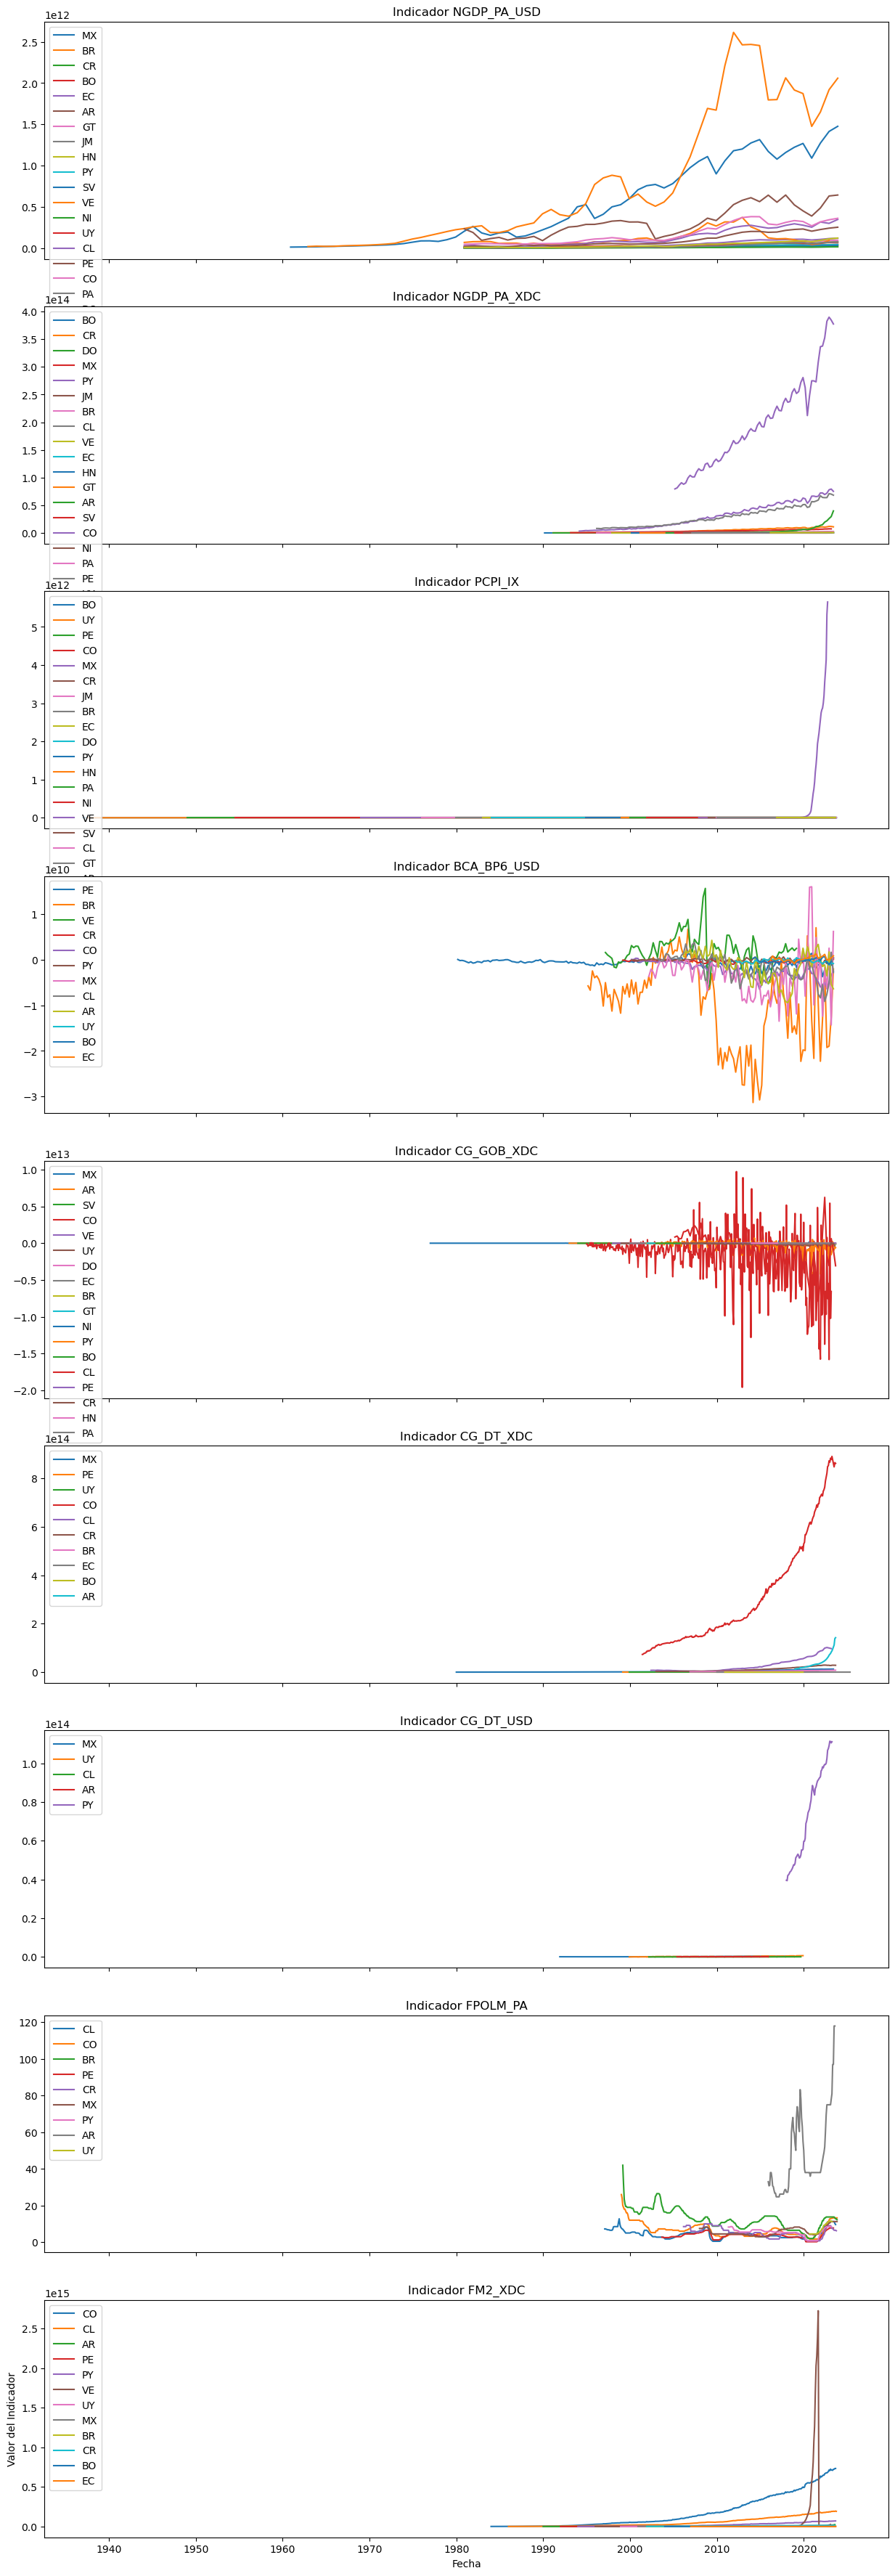

In [14]:
series_data=rawdata.copy()
series_data = series_data.sort_values(by='Fecha_Estructurada')
paises = list(set(series_data['refAreaID']))


import matplotlib.pyplot as plt
import pandas as pd

def graficar_series_tiempo(serie):
    num_indicadores = len(indicadores)
    fig, axs = plt.subplots(num_indicadores, 1, figsize=(15, 5*num_indicadores), sharex=True)
    
    # Iterar por cada indicador
    for i, indicador in enumerate(indicadores):
        # Filtrar datos para el indicador actual
        data_indicador = serie[serie['indicatorID'] == indicador]
        
        # Iterar por cada país y graficar la serie temporal
        paises = data_indicador['refAreaID'].unique()
        
        for pais in paises:
            data_pais = data_indicador[data_indicador['refAreaID'] == pais]
            axs[i].plot(data_pais['Fecha_Estructurada'], data_pais['obsValue_real'], label=f'{pais}')
        
        axs[i].set_title(f'Indicador {indicador}')
        axs[i].legend()
    
    plt.xlabel('Fecha')
    plt.ylabel('Valor del Indicador')
    plt.show()

graficar_series_tiempo(series_data)

## Conclusion preliminar:

Algunos paises por su escala ( por ejemplo modena nacional)  tienen unas cifras bastante  diferentes  frente a otro paises,  sin embargo en general todas  las  series de tiempo tienen un comportamiento "relacionado" es por esto que proponemos  realizar los mismos graficos de series de tiempo escalando los valores

In [15]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# que tal si  graficamos lo mismo pero con los datos escalados y rellenado de na  basados en la media
def scale_columns(df, columns, threshold=1.5):
    df_scaled = df.copy()
    

    for column in columns:
        median = df[column].median()
        mean = df[column].mean()       
        df[column].fillna(mean, inplace=True)               
    

        if mean / median > threshold:
            scaler = StandardScaler()
        else:
            scaler = MinMaxScaler()

        df_scaled[column] = scaler.fit_transform(df[[column]])

    return df_scaled




def pivot_scale_and_tpivot(df_x):
    df=df_x.copy()
    df_pivot = df.pivot_table(index=['Fecha_Estructurada', 'refAreaID'], columns='indicatorID', values='obsValue_real').reset_index()
    columnas_a_escalar =  df_pivot.columns[2:]
    df_scaled = scale_columns(df_pivot, columnas_a_escalar)
    df_melted = pd.melt(df_scaled, id_vars=[ 'refAreaID','Fecha_Estructurada'], value_vars=columnas_a_escalar, var_name='indicatorID', value_name='obsValue_real')
    df_melted = df_melted.sort_values(by='Fecha_Estructurada')
    return df_melted


       
    



In [16]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# que tal si  graficamos lo mismo pero con los datos escalados y rellenado de na  basados en la media
def scale_columns(df, columns, threshold=1.5):
    df_scaled = df.copy()
    

    for column in columns:
        median = df[column].median()
        mean = df[column].mean()       
        df[column].fillna(mean, inplace=True)               
    

        if mean / median > threshold:
            scaler = StandardScaler()
        else:
            scaler = MinMaxScaler()

        df_scaled[column] = scaler.fit_transform(df[[column]])

    return df_scaled




def pivot_scale_and_tpivot(df_x):
    df=df_x.copy()
    df_pivot = df.pivot_table(index=['Fecha_Estructurada', 'refAreaID'], columns='indicatorID', values='obsValue_real').reset_index()
    columnas_a_escalar =  df_pivot.columns[2:]
    df_scaled = scale_columns(df_pivot, columnas_a_escalar)
    df_melted = pd.melt(df_scaled, id_vars=[ 'refAreaID','Fecha_Estructurada'], value_vars=columnas_a_escalar, var_name='indicatorID', value_name='obsValue_real')
    df_melted = df_melted.sort_values(by='Fecha_Estructurada')
    return df_melted



In [17]:
series_data_e=pivot_scale_and_tpivot(series_data)
series_data_e

,refAreaID,Fecha_Estructurada,indicatorID,obsValue_real
0,BO,1937-01-01,BCA_BP6_USD,1.681511e-16
415730,BO,1937-01-01,LLF_PE_NUM,5.169517e-01
118780,BO,1937-01-01,CG_DT_USD,0.000000e+00
427608,BO,1937-01-01,LUR_PT,2.764709e-01
106902,BO,1937-01-01,CG_DE_XDC,-1.975114e-16
...,...,...,...,...
118779,EC,2025-05-01,CG_DE_XDC,-1.098281e+00
83145,EC,2025-05-01,BXG_BP6_USD,0.000000e+00
451363,EC,2025-05-01,NGDP_PA_R_XDC,-2.611039e-16
403851,EC,2025-05-01,LER_PT,7.655558e-01


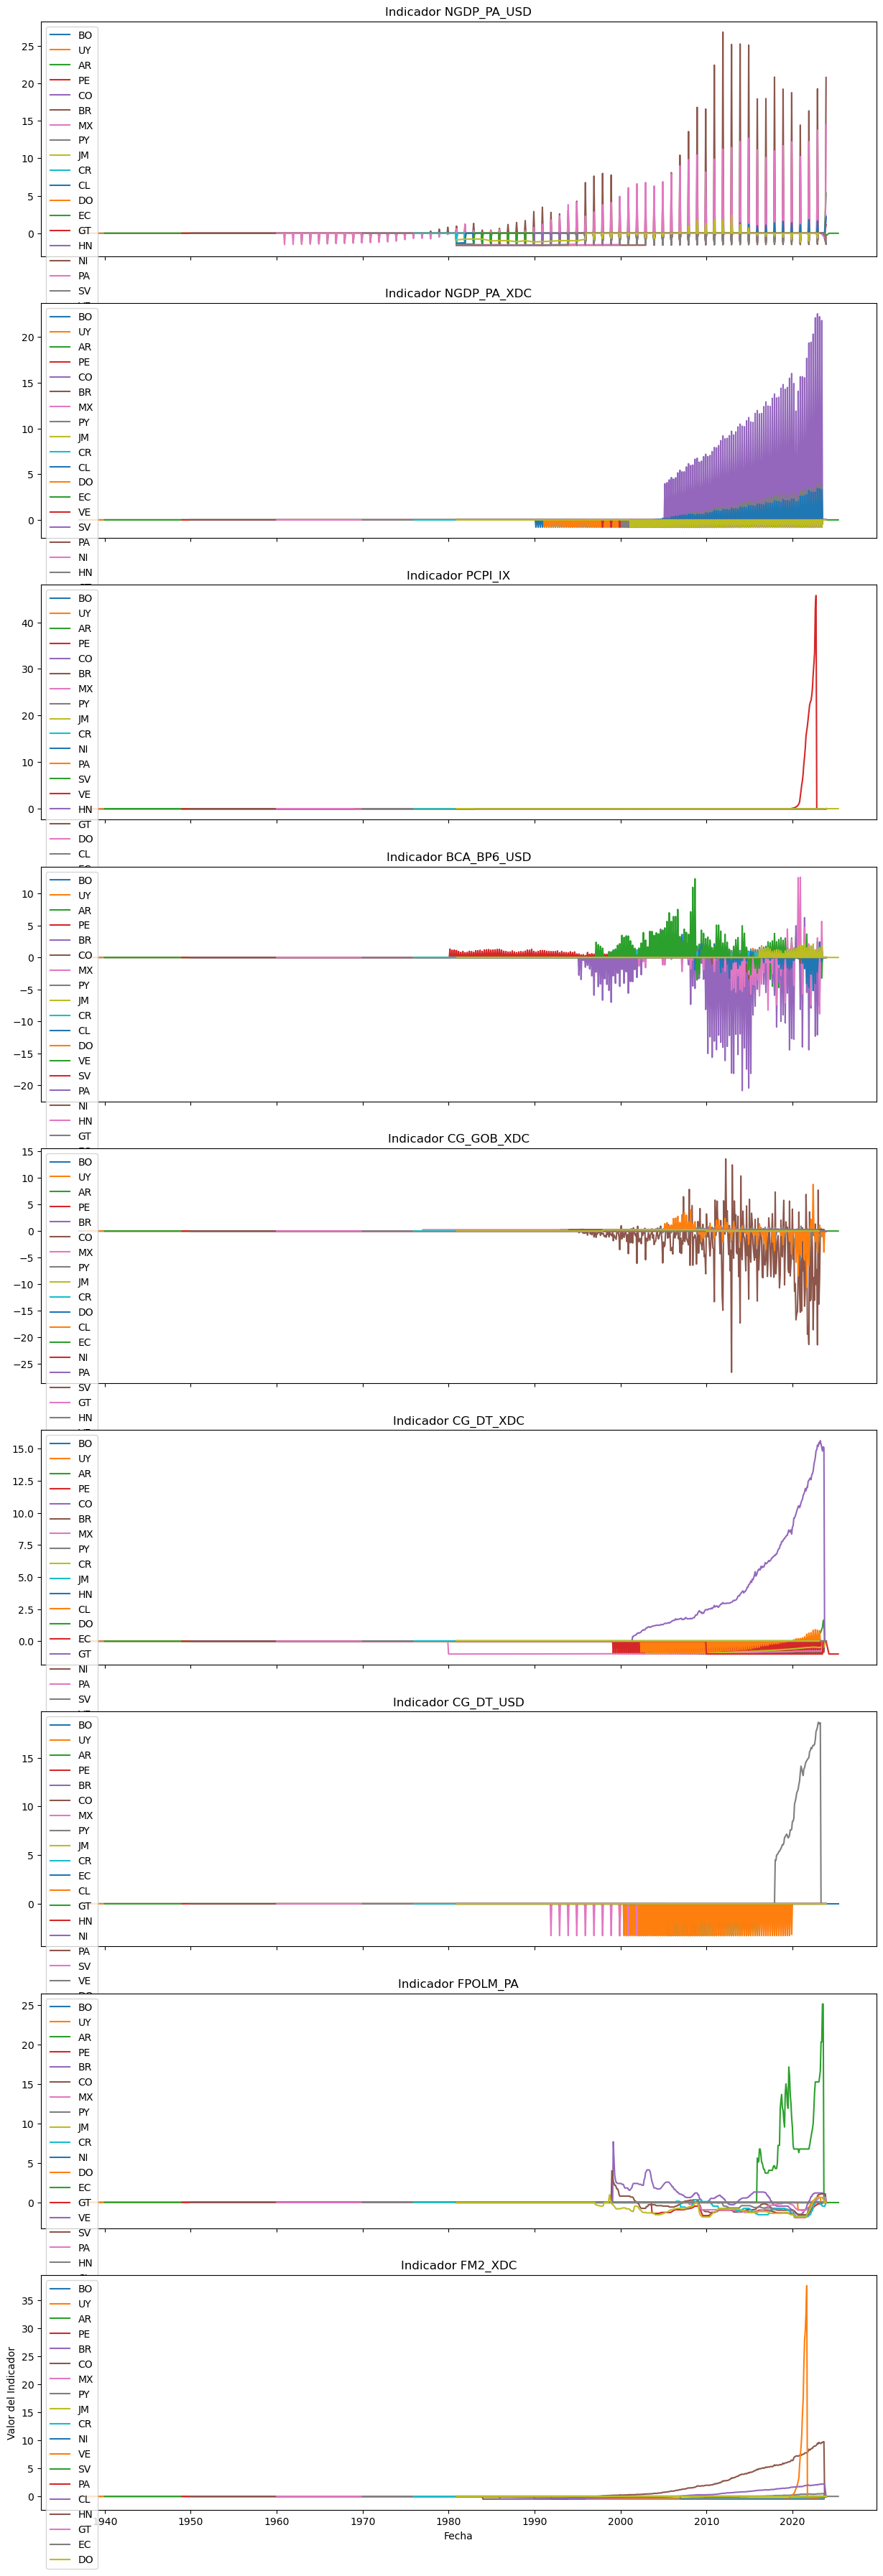

In [18]:
graficar_series_tiempo(series_data_e)

## Conclusion preliminar 2
Se comprueba entonces que  las  series de tiempo tienen un comportamiento "relacionado" es por esto que proponemos  realizar un mapa de correlaciones

In [19]:
# preparacion de los datos para  hacer mapas de correlaciones 

def data_cor(df,umbral_fila,umbral_columna):
    d_cor=df.copy()
    df_pivot = d_cor.pivot_table(index=['Fecha_Estructurada', 'refAreaID'], columns='indicatorID', values='obsValue_real').reset_index()

    # Calcula la proporción de valores no nulos por fila
    proporcion_no_nulos_por_fila = df_pivot.notnull().mean(axis=1)
    
    # Filtra las filas que superan el umbral
    filas_a_mantener = proporcion_no_nulos_por_fila[proporcion_no_nulos_por_fila >= umbral_fila].index
    
    # Filtra el DataFrame original
    df_pivot_filtrado_por_fila = df_pivot.loc[filas_a_mantener]
    df_pivot_filtrado_por_fila

    # Calcula la proporción de valores no nulos por columna
    proporcion_no_nulos_por_columna = df_pivot_filtrado_por_fila.notnull().mean(axis=0)
    
    # Filtra las columnas que superan el umbral
    columnas_a_mantener = proporcion_no_nulos_por_columna[proporcion_no_nulos_por_columna >= umbral_columna].index
    
    # Filtra el DataFrame original
    df_pivot_filtrado_por_columna = df_pivot_filtrado_por_fila[columnas_a_mantener]
    df_pivot_filtrado_por_columna
    return df_pivot_filtrado_por_columna

In [20]:
cor_data=rawdata.copy()
cor_data = cor_data.sort_values(by='Fecha_Estructurada')
cor_data=cor_data[['refAreaID','indicatorID','Fecha_Estructurada','obsValue_real']]
cor_data        

,refAreaID,indicatorID,Fecha_Estructurada,obsValue_real
30393,BO,PCPI_IX,1937-01-01,1.423622e-08
30394,BO,PCPI_IX,1937-02-01,1.458773e-08
30395,BO,PCPI_IX,1937-03-01,1.537863e-08
30396,BO,PCPI_IX,1937-04-01,1.432409e-08
30397,BO,PCPI_IX,1937-05-01,1.406046e-08
...,...,...,...,...
85291,CO,NGDP_PA_USD,2023-12-01,3.619410e+11
92680,EC,CG_DE_XDC,2024-04-01,4.741792e+10
92678,EC,CG_DT_XDC,2024-04-01,6.223138e+10
92681,EC,CG_DE_XDC,2025-05-01,4.624564e+10


In [21]:
cor_data=data_cor(cor_data,0.5,0)
cor_data

indicatorID,Fecha_Estructurada,refAreaID,BCA_BP6_USD,BIP_BP6_USD,BIS_BP6_USD,BKF_BP6_USD,BMG_BP6_USD,BS_BP6_USD,BXG_BP6_USD,CG_DD_XDC,...,LLF_PE_NUM,LUR_PT,NGDP_PA_R_XDC,NGDP_PA_USD,NGDP_PA_XDC,PCPI_IX,RAFA_USD,TMG_CIF_USD,TTT_BY_CP_A_IX,TXG_FOB_USD
6456,1999-12-01,CR,-3.149502e+08,-1.632351e+08,1.673614e+07,-3.082659e+08,1.299944e+09,1.229284e+08,1.008564e+09,NaN,...,NaN,NaN,4.355972e+12,1.425900e+10,1.140919e+12,27.030463,1.472098e+09,1.066884e+09,NaN,5.216327e+08
6520,2000-03-01,PY,-5.734874e+07,-2.942117e+08,4.457750e+07,1.543049e+08,5.868250e+08,-3.609500e+07,8.152055e+08,NaN,...,NaN,NaN,2.493415e+13,NaN,7.098192e+12,34.017913,NaN,2.026684e+08,93.389158,3.168119e+08
6574,2000-06-01,PY,-7.900039e+06,-2.805363e+08,4.307750e+07,1.979776e+07,6.744250e+08,-5.778500e+07,9.617687e+08,NaN,...,NaN,NaN,2.670765e+13,NaN,7.644025e+12,34.237916,NaN,2.281665e+08,94.791241,3.129310e+08
6628,2000-09-01,PY,-5.273460e+07,-2.947313e+08,4.457750e+07,4.849576e+07,7.486250e+08,-5.615500e+07,1.002199e+09,NaN,...,NaN,NaN,2.544100e+13,NaN,7.391920e+12,35.049175,NaN,2.315409e+08,86.654080,3.126753e+08
6672,2000-12-01,CO,3.133572e+08,-4.453066e+08,4.424376e+08,1.134623e+07,2.837204e+09,-3.912905e+08,3.544721e+09,3.262129e+13,...,NaN,NaN,NaN,9.927000e+10,NaN,8.750000,8.738390e+09,9.941000e+08,98.002247,1.228400e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11777,2023-06-01,CO,-2.524484e+09,-3.401804e+09,3.017980e+09,-2.846336e+09,1.451584e+10,-4.276291e+08,1.280281e+10,NaN,...,NaN,9.342310,2.402666e+14,NaN,3.774650e+14,133.780000,5.726816e+10,5.015200e+09,148.735792,4.021000e+09
11778,2023-06-01,CR,1.445114e+08,-1.448062e+09,1.362332e+08,-1.896393e+09,5.432326e+09,2.120129e+09,4.768538e+09,NaN,...,NaN,9.584412,9.884816e+12,NaN,1.101158e+13,109.742531,1.113879e+10,3.636323e+09,NaN,1.611157e+09
11780,2023-06-01,EC,8.914153e+08,-5.406910e+08,1.192920e+09,7.399544e+08,7.046983e+09,-4.835186e+08,7.769688e+09,NaN,...,NaN,3.800000,1.812258e+10,NaN,2.969675e+10,111.180000,6.966529e+09,2.274317e+09,NaN,2.530850e+09
11784,2023-06-01,MX,6.247070e+09,1.321390e+09,3.112000e+08,6.885600e+09,1.524293e+11,1.617726e+10,1.510437e+11,NaN,...,NaN,2.671768,NaN,NaN,NaN,128.210000,2.104379e+11,5.176202e+10,48.534000,5.180021e+10


In [22]:
columnas_a_escalar =  cor_data.columns[2:]
cor_data = scale_columns(cor_data, columnas_a_escalar)
cor_data

indicatorID,Fecha_Estructurada,refAreaID,BCA_BP6_USD,BIP_BP6_USD,BIS_BP6_USD,BKF_BP6_USD,BMG_BP6_USD,BS_BP6_USD,BXG_BP6_USD,CG_DD_XDC,...,LLF_PE_NUM,LUR_PT,NGDP_PA_R_XDC,NGDP_PA_USD,NGDP_PA_XDC,PCPI_IX,RAFA_USD,TMG_CIF_USD,TTT_BY_CP_A_IX,TXG_FOB_USD
6456,1999-12-01,CR,0.416112,0.771236,-0.972516,0.397930,-0.729786,0.485686,-0.775937,0.331058,...,0.520287,0.301339,-5.238992e-01,-1.462044e+00,-5.320211e-01,-0.171605,-0.682723,-0.624985,0.000000,-0.681382
6520,2000-03-01,PY,0.473534,0.730823,-0.916015,0.494343,-0.757724,0.480591,-0.783441,0.331058,...,0.520287,0.301339,-9.468141e-02,-2.355512e-16,-4.217588e-01,-0.169185,0.000000,-0.720562,-0.372778,-0.703248
6574,2000-06-01,PY,0.484557,0.735042,-0.919059,0.466308,-0.754292,0.479897,-0.777753,0.331058,...,0.520287,0.301339,-5.768985e-02,-2.355512e-16,-4.116561e-01,-0.169108,0.000000,-0.717742,-0.372778,-0.703663
6628,2000-09-01,PY,0.474563,0.730662,-0.916015,0.472289,-0.751385,0.479949,-0.776184,0.331058,...,0.520287,0.301339,-8.410962e-02,-2.355512e-16,-4.163223e-01,-0.168827,0.000000,-0.717369,-0.372778,-0.703690
6672,2000-12-01,CO,0.556169,0.684203,-0.108606,0.464546,-0.669560,0.469212,-0.677509,0.000000,...,0.520287,0.301339,-8.147621e-17,-1.133964e+00,-7.230019e-17,-0.177939,-0.595987,-0.633034,-0.372778,-0.605931
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11777,2023-06-01,CO,-0.076417,-0.228022,5.118148,-0.131076,-0.212024,0.468048,-0.318203,0.331058,...,0.520287,0.324412,4.396702e+00,-2.355512e-16,6.433305e+00,-0.134621,-0.016703,-0.188323,-0.372776,-0.307803
11778,2023-06-01,CR,0.518531,0.374803,-0.730011,0.066919,-0.567891,0.549668,-0.630012,0.331058,...,0.520287,0.335565,-4.085791e-01,-2.355512e-16,-3.493265e-01,-0.142949,-0.567335,-0.340819,0.000000,-0.565069
11780,2023-06-01,EC,0.685024,0.654772,1.414408,0.616409,-0.504633,0.466258,-0.513538,0.331058,...,0.520287,0.069099,-6.143777e-01,-2.355512e-16,-5.525886e-01,-0.142451,-0.617138,-0.491449,0.000000,-0.466886
11784,2023-06-01,MX,1.878858,1.229315,-0.374937,1.897336,5.191038,1.000000,5.046917,0.331058,...,0.520287,0.017126,-8.147621e-17,-2.355512e-16,-7.230019e-17,-0.136550,1.811636,4.981617,-0.372780,4.792923


In [23]:
columnas_a_escalar

Index(['BCA_BP6_USD', 'BIP_BP6_USD', 'BIS_BP6_USD', 'BKF_BP6_USD',
       'BMG_BP6_USD', 'BS_BP6_USD', 'BXG_BP6_USD', 'CG_DD_XDC', 'CG_DE_USD',
       'CG_DE_XDC', 'CG_DT_USD', 'CG_DT_XDC', 'CG_GOB_XDC', 'CG_GPB_XDC',
       'DS_USD', 'DS_XDC', 'D_USD', 'EA_IX', 'ENDA_XDC_USD_RATE',
       'ENDE_XDC_USD_RATE', 'FASMB_XDC', 'FID_FX_USD', 'FID_FX_XDC',
       'FID_NC_USD', 'FID_NC_XDC', 'FM2_XDC', 'FPOLM_PA', 'FSANL_PT',
       'FSKERA_PT', 'FSNFC_USD', 'FSNFC_XDC', 'FSNNC_USD', 'FSNNC_XDC',
       'LER_PT', 'LEUR_PT', 'LLF_PE_NUM', 'LUR_PT', 'NGDP_PA_R_XDC',
       'NGDP_PA_USD', 'NGDP_PA_XDC', 'PCPI_IX', 'RAFA_USD', 'TMG_CIF_USD',
       'TTT_BY_CP_A_IX', 'TXG_FOB_USD'],
      dtype='object', name='indicatorID')

<Figure size 2000x1600 with 0 Axes>

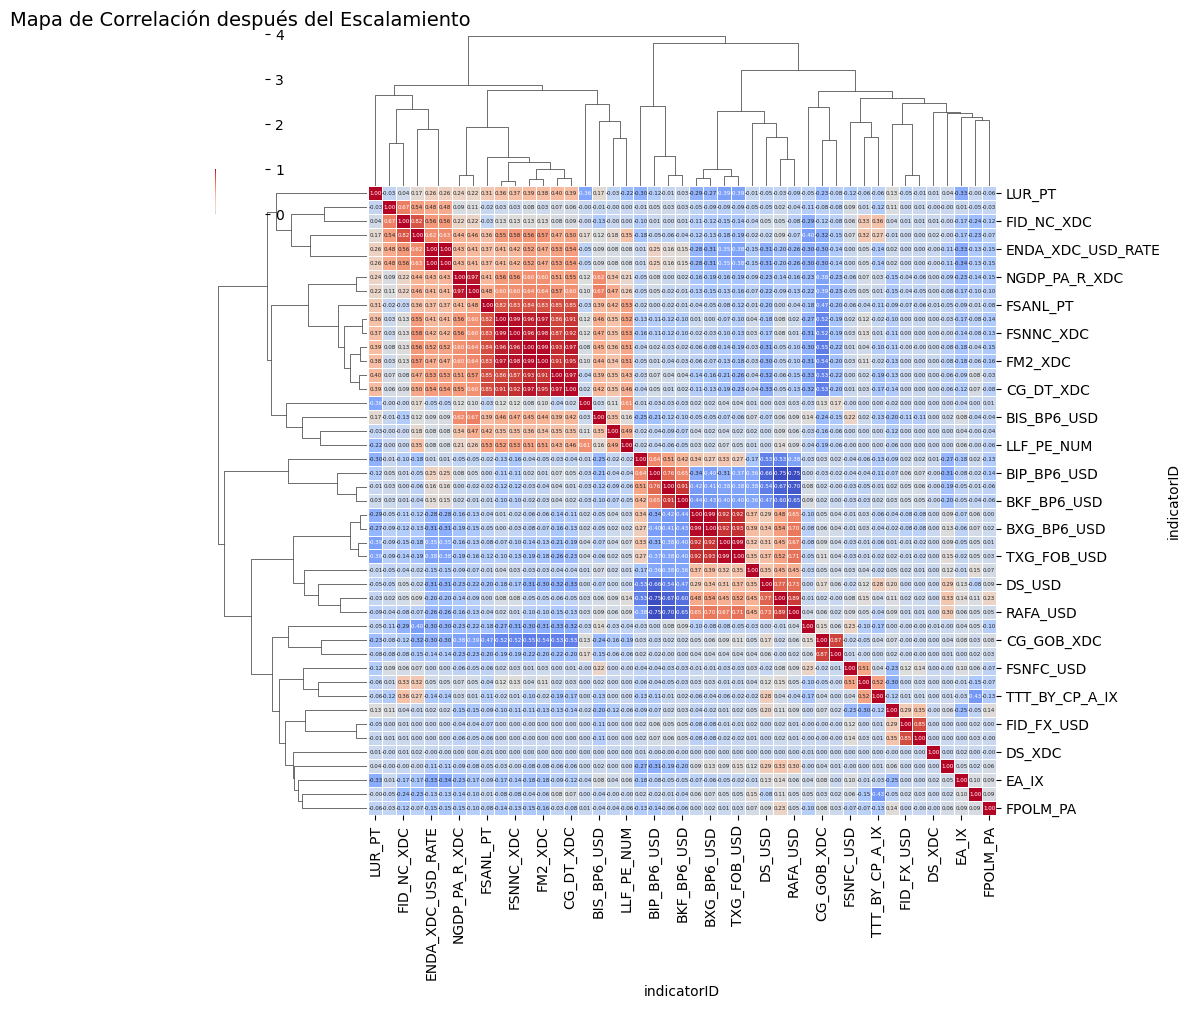

In [24]:
import seaborn as sns

# Calcula la correlación después del escalado
correlacion_escalada = cor_data[columnas_a_escalar].corr()

# Ajusta el tamaño de la fuente en el clustermap
annot_kws = {"size": 4}  # Ajusta el tamaño de la fuente según sea necesario

# Utiliza clustermap para organizar las filas y columnas según la correlación
plt.figure(figsize=(20, 16))
sns.clustermap(correlacion_escalada, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5, annot_kws=annot_kws)
plt.title('Mapa de Correlación después del Escalamiento', fontsize=14)
plt.xlim(0, 45)  # Ajusta los límites según el número total de columnas
plt.ylim(0, 4)
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()


In [25]:
cor_data['NGDP_PA_USD']

6456    -1.462044e+00
6520    -2.355512e-16
6574    -2.355512e-16
6628    -2.355512e-16
6672    -1.133964e+00
             ...     
11777   -2.355512e-16
11778   -2.355512e-16
11780   -2.355512e-16
11784   -2.355512e-16
11786   -2.355512e-16
Name: NGDP_PA_USD, Length: 1009, dtype: float64

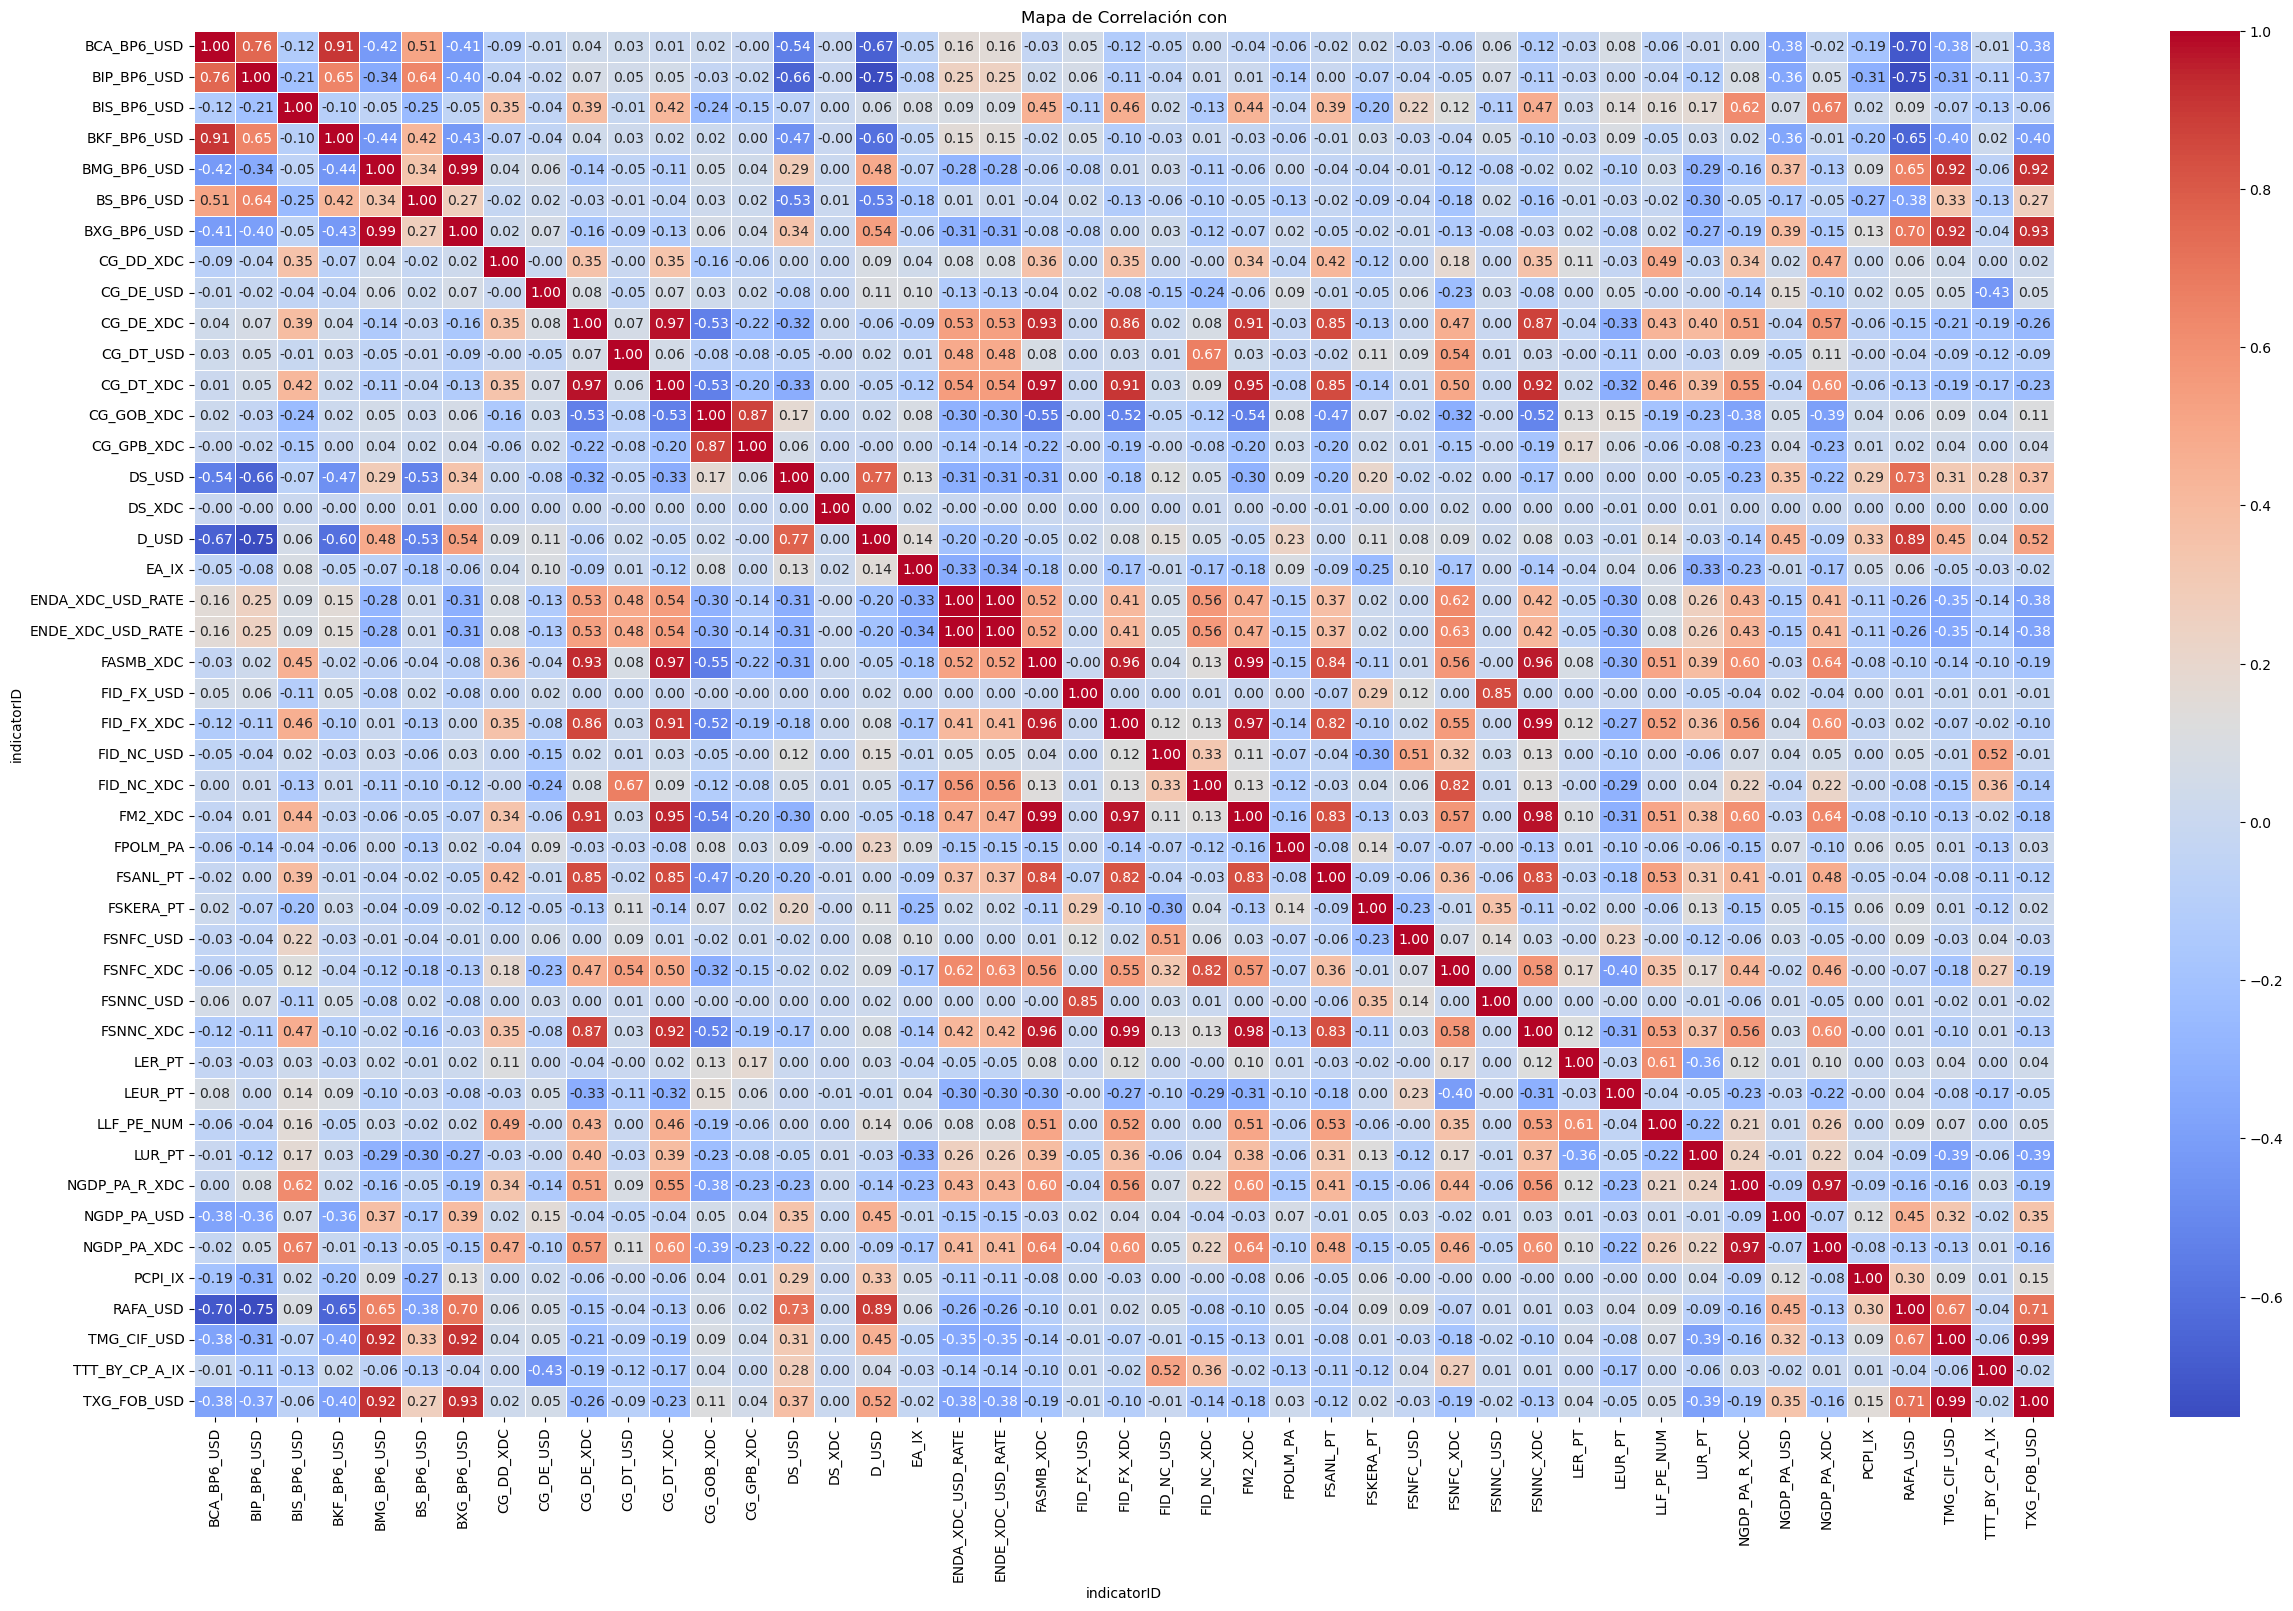

In [26]:

correlacion_escalada = cor_data[columnas_a_escalar].corr()

# Ajusta el tamaño de la fuente en el clustermap
annot_kws = {"size": 4}  # Ajusta el tamaño de la fuente según sea necesario

plt.figure(figsize=(30, 18))
sns.heatmap(correlacion_escalada, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")
plt.title('Mapa de Correlación con')
plt.show()

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcula la correlación después del escalado
correlacion_escalada = cor_data[columnas_a_escalar].corr()

# Imprime solo los números de la matriz de correlación
print("Matriz de Correlación después del Escalamiento:")
print(correlacion_escalada)

Matriz de Correlación después del Escalamiento:
indicatorID        BCA_BP6_USD  BIP_BP6_USD  BIS_BP6_USD  BKF_BP6_USD  \
indicatorID                                                             
BCA_BP6_USD           1.000000     0.758150    -0.123814     0.906147   
BIP_BP6_USD           0.758150     1.000000    -0.211052     0.647032   
BIS_BP6_USD          -0.123814    -0.211052     1.000000    -0.095765   
BKF_BP6_USD           0.906147     0.647032    -0.095765     1.000000   
BMG_BP6_USD          -0.419660    -0.335736    -0.054733    -0.443541   
BS_BP6_USD            0.511278     0.643121    -0.250279     0.420246   
BXG_BP6_USD          -0.411061    -0.400357    -0.049426    -0.430305   
CG_DD_XDC            -0.087205    -0.041991     0.350405    -0.074600   
CG_DE_USD            -0.010767    -0.015195    -0.043548    -0.041757   
CG_DE_XDC             0.036710     0.074821     0.390282     0.040051   
CG_DT_USD             0.032497     0.047683    -0.006282     0.027586   
CG_

In [28]:
# para finalizar el EDA  podemos  ejecutar TNSE  y verificar si los 19 paises son "clasificables"  entre FLAR / NO FLAR

clafdata_0


Indicator-fecha,refAreaID,MIEMBRO_FLAR,NGDP_PA_R_XDC_2016-12-01,NGDP_PA_R_XDC_2017-12-01,NGDP_PA_R_XDC_2018-12-01,NGDP_PA_USD_1980-12-01,NGDP_PA_USD_1981-12-01,NGDP_PA_USD_1982-12-01,NGDP_PA_USD_1983-12-01,NGDP_PA_USD_1984-12-01,...,PCPI_IX_2022-01-01,PCPI_IX_2022-02-01,PCPI_IX_2022-03-01,PCPI_IX_2022-04-01,PCPI_IX_2022-05-01,PCPI_IX_2022-06-01,PCPI_IX_2022-07-01,PCPI_IX_2022-08-01,PCPI_IX_2022-09-01,PCPI_IX_2022-10-01
0,AR,0,1.732935e+11,1.811482e+11,1.696640e+11,2.336960e+11,1.898020e+11,9.425000e+10,1.162670e+11,1.305440e+11,...,6.050300e+02,6.334300e+02,6.760600e+02,7.169400e+02,7.531000e+02,7.930300e+02,8.517600e+02,9.111300e+02,9.673100e+02,1.028710e+03
1,BO,1,1.178575e+10,1.240263e+10,1.280853e+10,3.589000e+09,3.440000e+09,3.813000e+09,3.609000e+09,3.752000e+09,...,1.058485e+02,1.059791e+02,1.059293e+02,1.059586e+02,1.063588e+02,1.067688e+02,1.071867e+02,1.072273e+02,1.073822e+02,1.081841e+02
2,BR,0,2.866229e+11,2.940087e+11,2.985732e+11,2.377720e+11,2.585530e+11,2.712520e+11,1.894590e+11,1.897440e+11,...,6.153090e+03,6.215240e+03,6.315930e+03,6.382880e+03,6.412880e+03,6.455850e+03,6.411950e+03,6.388870e+03,6.370340e+03,6.407930e+03
3,CL,1,4.682136e+13,4.830926e+13,5.006533e+13,2.903200e+10,3.437400e+10,2.563000e+10,2.081900e+10,2.024600e+10,...,1.157700e+02,1.161000e+02,1.182600e+02,1.199100e+02,1.213500e+02,1.224800e+02,1.241600e+02,1.256700e+02,1.267500e+02,1.274100e+02
4,CO,1,2.179012e+14,2.209009e+14,2.273052e+14,4.650100e+10,5.066100e+10,5.425200e+10,5.392000e+10,5.325700e+10,...,1.132600e+02,1.151100e+02,1.162600e+02,1.177100e+02,1.187000e+02,1.193100e+02,1.202700e+02,1.215000e+02,1.226300e+02,1.235100e+02
5,CR,1,8.528619e+12,8.915701e+12,8.955834e+12,4.854000e+09,2.636000e+09,2.619000e+09,3.162000e+09,3.678000e+09,...,1.036812e+02,1.048147e+02,1.057394e+02,1.074071e+02,1.089571e+02,1.108941e+02,1.120987e+02,1.130628e+02,1.119847e+02,1.111315e+02
6,DO,0,1.531043e+02,1.602492e+02,1.714387e+02,8.672000e+09,9.698000e+09,9.141000e+09,9.461000e+09,1.487000e+10,...,1.146000e+02,1.156600e+02,1.164300e+02,1.175400e+02,1.181200e+02,1.188800e+02,1.194700e+02,1.197200e+02,1.200700e+02,1.204100e+02
7,EC,1,1.747043e+10,1.795238e+10,1.808393e+10,1.684000e+10,1.724300e+10,1.721400e+10,1.512900e+10,1.610100e+10,...,1.070200e+02,1.072700e+02,1.073900e+02,1.080300e+02,1.086300e+02,1.093400e+02,1.095100e+02,1.095400e+02,1.099300e+02,1.100600e+02
8,GT,0,1.200783e+11,1.225437e+11,1.264769e+11,7.718000e+09,8.431000e+09,8.539000e+09,8.864000e+09,9.276000e+09,...,1.531400e+02,1.537900e+02,1.560900e+02,1.569300e+02,1.589800e+02,1.618900e+02,1.636400e+02,1.647600e+02,1.653500e+02,1.669700e+02
9,HN,0,5.229170e+10,5.465230e+10,5.708880e+10,3.968000e+09,4.044000e+09,4.267000e+09,4.477000e+09,4.915000e+09,...,3.730000e+02,3.743000e+02,3.778000e+02,3.842000e+02,3.876000e+02,3.927000e+02,3.962000e+02,3.961000e+02,3.966000e+02,3.992000e+02


In [29]:
columnas_a_escalar =  clafdata_100.columns[2:]
columnas_a_escalar_50 =  clafdata_50.columns[2:]
columnas_a_escalar_0=clafdata_0.columns[2:]
columnas_a_escalar_0

Index(['NGDP_PA_R_XDC_2016-12-01', 'NGDP_PA_R_XDC_2017-12-01',
       'NGDP_PA_R_XDC_2018-12-01', 'NGDP_PA_USD_1980-12-01',
       'NGDP_PA_USD_1981-12-01', 'NGDP_PA_USD_1982-12-01',
       'NGDP_PA_USD_1983-12-01', 'NGDP_PA_USD_1984-12-01',
       'NGDP_PA_USD_1985-12-01', 'NGDP_PA_USD_1986-12-01',
       ...
       'PCPI_IX_2022-01-01', 'PCPI_IX_2022-02-01', 'PCPI_IX_2022-03-01',
       'PCPI_IX_2022-04-01', 'PCPI_IX_2022-05-01', 'PCPI_IX_2022-06-01',
       'PCPI_IX_2022-07-01', 'PCPI_IX_2022-08-01', 'PCPI_IX_2022-09-01',
       'PCPI_IX_2022-10-01'],
      dtype='object', name='Indicator-fecha', length=119)

In [30]:
clafdata_100_scaled = scale_columns(clafdata_100, columnas_a_escalar)
clafdata_50_scaled= scale_columns(clafdata_50, columnas_a_escalar_50)
clafdata_0_scaled= scale_columns(clafdata_0, columnas_a_escalar_0)

In [31]:
clafdata_50_scaled.shape

(19, 3624)

In [32]:
from sklearn.manifold import TSNE
def plot_tsne(tsnedata,perplexity,learning_rate):
    etiquetas = tsnedata['MIEMBRO_FLAR'].tolist()
    nombres_paises_list = tsnedata['refAreaID'].tolist()
    
    tsne = TSNE(n_components=2, perplexity=perplexity, learning_rate=learning_rate)
    
    # Ajusta el modelo T-SNE a tus datos (asegúrate de eliminar las columnas no necesarias para el ajuste)
    tsne_result = tsne.fit_transform(tsnedata.drop(['MIEMBRO_FLAR', 'refAreaID'], axis=1))
    
    # Define colores
    colores = ['r', 'b']
    colores_puntos = [colores[et] for et in etiquetas]
    
    # Crea el gráfico t-SNE y asigna colores a los puntos
    plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=colores_puntos, s=50)
    
    # Anota los puntos con los nombres de los países
    for i, nombre_pais in enumerate(nombres_paises_list):
        print("x :{}, y:{}, country:{} ".format(tsne_result[i, 0],tsne_result[i, 1],nombre_pais))
        plt.text(tsne_result[i, 0], tsne_result[i, 1], nombre_pais, fontsize=8)
    
    # Añade etiquetas y muestra el gráfico
    plt.title('Visualización T-SNE')
    plt.xlabel('T-SNE Dimension 1')
    plt.ylabel('T-SNE Dimension 2')
plt.show()
    

x :-2.808488607406616, y:-34.43162536621094, country:AR 
x :-10.706645965576172, y:-18.061328887939453, country:BO 
x :-86.24526977539062, y:88.04187774658203, country:BR 
x :8.820351600646973, y:-34.2442512512207, country:CL 
x :12.23034954071045, y:44.49671173095703, country:CO 
x :17.76303482055664, y:48.947933197021484, country:CR 
x :6.678288459777832, y:52.91469192504883, country:DO 
x :56.64152908325195, y:133.43785095214844, country:EC 
x :9.246255874633789, y:53.45176696777344, country:GT 
x :-9.489978790283203, y:-23.492603302001953, country:HN 
x :13.542168617248535, y:48.508827209472656, country:JM 
x :-11.868866920471191, y:-26.640541076660156, country:MX 
x :1.5605686902999878, y:-32.90287399291992, country:NI 
x :3.9846689701080322, y:-34.834136962890625, country:PA 
x :-14.696969032287598, y:-16.438573837280273, country:PE 
x :4.480493545532227, y:-39.70053482055664, country:PY 
x :10.648694038391113, y:57.754180908203125, country:SV 
x :-7.818517684936523, y:-14.937492

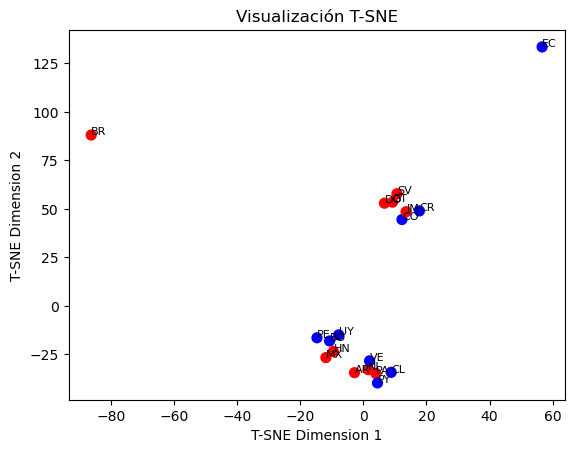

In [33]:
plot_tsne(clafdata_100_scaled,1,9)

x :4.957805633544922, y:24.409860610961914, country:AR 
x :-37.34336853027344, y:-14.036894798278809, country:BO 
x :-38.60911178588867, y:47.23634719848633, country:BR 
x :3.0385096073150635, y:9.663047790527344, country:CL 
x :3.5175468921661377, y:6.756192684173584, country:CO 
x :18.695499420166016, y:-32.68452453613281, country:CR 
x :15.886722564697266, y:-33.234806060791016, country:DO 
x :-38.07373809814453, y:-9.134769439697266, country:EC 
x :12.13143253326416, y:-33.97126007080078, country:GT 
x :2.5914812088012695, y:22.384187698364258, country:HN 
x :18.695499420166016, y:-32.68452453613281, country:JM 
x :-0.23154614865779877, y:23.67063331604004, country:MX 
x :3.4908230304718018, y:15.897536277770996, country:NI 
x :2.2034034729003906, y:14.169353485107422, country:PA 
x :-37.34336853027344, y:-14.036894798278809, country:PE 
x :-1.2500818967819214, y:13.81055736541748, country:PY 
x :10.327438354492188, y:-34.32606506347656, country:SV 
x :-37.78874206542969, y:-11.046

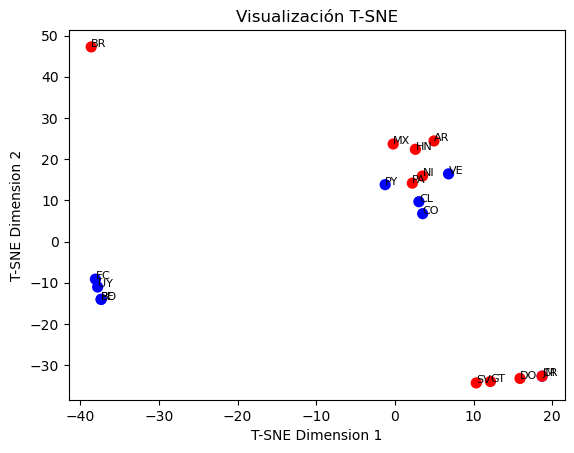

In [34]:
plot_tsne(clafdata_50_scaled,1,1)

x :-9.789094924926758, y:15.3272705078125, country:AR 
x :7.077860355377197, y:-38.78593826293945, country:BO 
x :-14.569531440734863, y:10.488443374633789, country:BR 
x :-7.10814094543457, y:18.562122344970703, country:CL 
x :-8.708524703979492, y:21.60590171813965, country:CO 
x :14.272130966186523, y:-38.796958923339844, country:CR 
x :4.984335899353027, y:20.073030471801758, country:DO 
x :0.9885486960411072, y:19.43360137939453, country:EC 
x :7.107990264892578, y:20.42812728881836, country:GT 
x :-6.117602348327637, y:-38.950748443603516, country:HN 
x :0.9373286962509155, y:-38.854644775390625, country:JM 
x :-12.30026626586914, y:12.735246658325195, country:MX 
x :-2.933274507522583, y:-38.90782165527344, country:NI 
x :10.716586112976074, y:-38.7712516784668, country:PA 
x :-2.748192548751831, y:18.899768829345703, country:PE 
x :17.453895568847656, y:-38.86305618286133, country:PY 
x :3.0951220989227295, y:-38.82931900024414, country:SV 
x :10.480636596679688, y:21.012279510

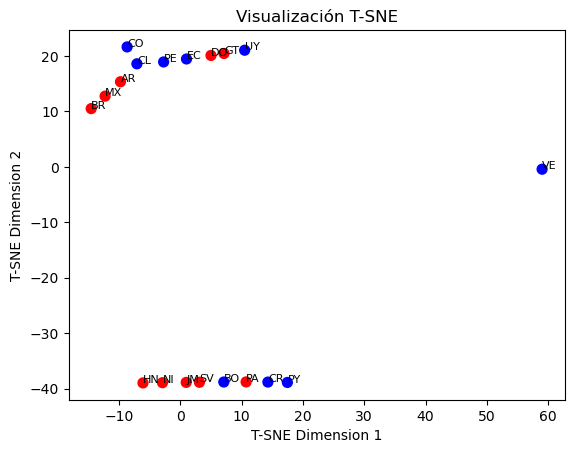

In [35]:
plot_tsne(clafdata_0_scaled,1,1)

#### Conclusiones TSNE 
Aplicar TSNE a los datos  teniendo en cuenta 16.727,3624 y 122 dimensiones   nos permite entender que hay valores  en sus indicadores que permiten agrupar los paises FLAR en dos subgrupos ( uno  donde CO participa y otro donde BO participa)  y alrededor de ellos hay unos paises que no son FLAR pero comparten datos en sus indicadores,  realizaremos PCA para encontrar el conjunto de  datos 

In [36]:
#Funcion PCA

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

def apply_pca_with_labels(df, target_column, label_column):
    # Extraer las características, las etiquetas y las etiquetas de país
    X = df.drop([target_column, label_column], axis=1)
    y = df[target_column]
    labels = df[label_column]

    # Normalizar los datos para que tengan media cero y desviación estándar uno
    #X_normalized = StandardScaler().fit_transform(X)
    X_normalized = X

    # Aplicar PCA con dos componentes principales
    pca = PCA(n_components=2)
    principal_components = pca.fit_transform(X_normalized)

    # Crear un DataFrame con los resultados para facilitar el análisis
    components_df = pd.DataFrame(data=principal_components, columns=['Principal Component 1', 'Principal Component 2'])
    final_df = pd.concat([components_df, pd.DataFrame({target_column: y, label_column: labels})], axis=1)

    # Visualizar los resultados
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(1, 1, 1)
    ax.set_xlabel('Principal Component 1', fontsize=15)
    ax.set_ylabel('Principal Component 2', fontsize=15)
    ax.set_title(f'PCA de {target_column} con Etiquetas de País', fontsize=20)

    targets = df[target_column].unique()
    colors = ['r', 'b', 'g', 'c', 'm', 'y', 'k']

    for target, color in zip(targets, colors):
        indices_to_keep = final_df[target_column] == target
        ax.scatter(final_df.loc[indices_to_keep, 'Principal Component 1'],
                   final_df.loc[indices_to_keep, 'Principal Component 2'],
                   c=color, s=50, label=target)

    # Mostrar etiquetas de país para cada punto
    for i, label in enumerate(labels):
        ax.annotate(label, (final_df['Principal Component 1'][i], final_df['Principal Component 2'][i]))

    ax.legend()
    ax.grid()

    plt.show()

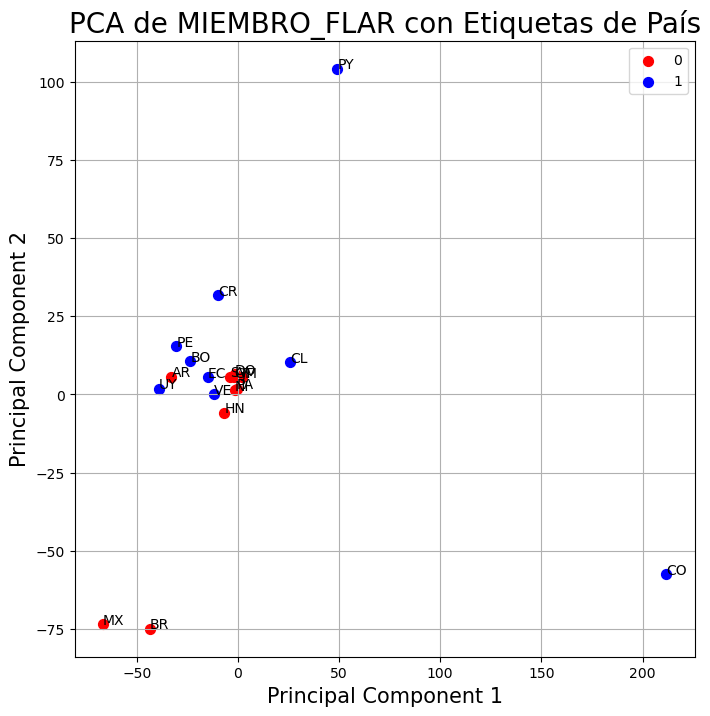

In [37]:
# Example usage for clafdata_100_scaled
apply_pca_with_labels(clafdata_100_scaled, "MIEMBRO_FLAR", 'refAreaID')


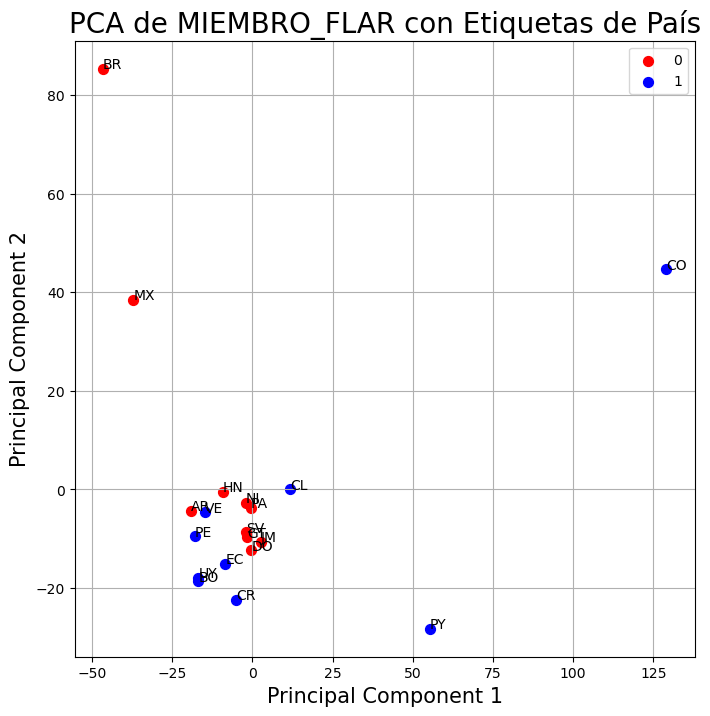

In [38]:
# Example usage for clafdata_50_scaled
apply_pca_with_labels(clafdata_50_scaled, "MIEMBRO_FLAR", 'refAreaID')

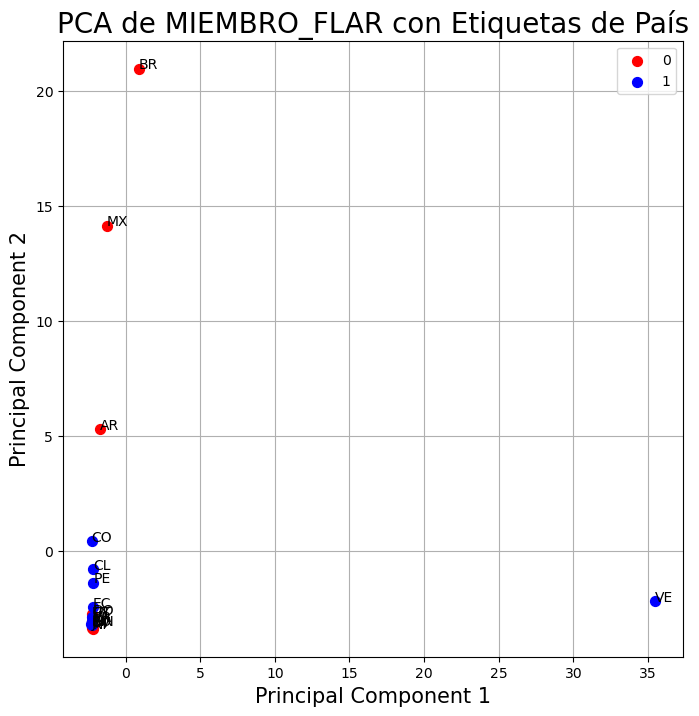

In [39]:
# Example usage for clafdata_0_scaled
apply_pca_with_labels(clafdata_0_scaled, "MIEMBRO_FLAR", 'refAreaID')

In [40]:
#Conclusiones Globales

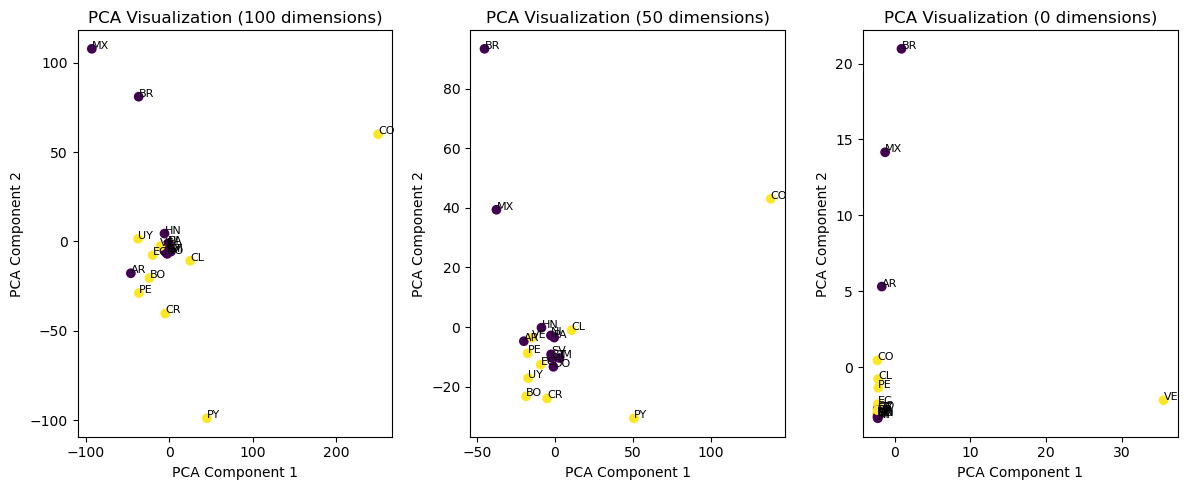

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Assuming you've already loaded clafdata_0_scaled, clafdata_50_scaled, and clafdata_100_scaled

# Function to apply PCA with labels
def apply_pca_with_labels(df, target_column, label_column):
    X = df.drop([target_column, label_column], axis=1)
    y = df[target_column]
    labels = df[label_column]

    # Normalizing the data
    scaler = StandardScaler()
    X_normalized = scaler.fit_transform(X)

    # Applying PCA
    pca = PCA(n_components=2)
    principal_components = pca.fit_transform(X_normalized)

    # Creating a DataFrame for visualization
    components_df = pd.DataFrame(data=principal_components, columns=['Principal Component 1', 'Principal Component 2'])
    final_df = pd.concat([components_df, pd.DataFrame({target_column: y, label_column: labels})], axis=1)

    return final_df

# Apply PCA to clafdata_100_scaled
pca_result_100 = apply_pca_with_labels(clafdata_100_scaled, "MIEMBRO_FLAR", 'refAreaID')

# Apply PCA to clafdata_50_scaled
pca_result_50 = apply_pca_with_labels(clafdata_50_scaled, "MIEMBRO_FLAR", 'refAreaID')

# Apply PCA to clafdata_0_scaled
pca_result_0 = apply_pca_with_labels(clafdata_0_scaled, "MIEMBRO_FLAR", 'refAreaID')

# Visualize PCA results with country labels
plt.figure(figsize=(12, 5))
plt.subplot(1, 3, 1)
plt.scatter(pca_result_100['Principal Component 1'], pca_result_100['Principal Component 2'],
            c=pca_result_100['MIEMBRO_FLAR'], cmap='viridis')
plt.title('PCA Visualization (100 dimensions)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
for i, label in enumerate(pca_result_100['refAreaID']):
    plt.text(pca_result_100['Principal Component 1'][i], pca_result_100['Principal Component 2'][i], label, fontsize=8)

plt.subplot(1, 3, 2)
plt.scatter(pca_result_50['Principal Component 1'], pca_result_50['Principal Component 2'],
            c=pca_result_50['MIEMBRO_FLAR'], cmap='viridis')
plt.title('PCA Visualization (50 dimensions)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
for i, label in enumerate(pca_result_50['refAreaID']):
    plt.text(pca_result_50['Principal Component 1'][i], pca_result_50['Principal Component 2'][i], label, fontsize=8)

plt.subplot(1, 3, 3)
plt.scatter(pca_result_0['Principal Component 1'], pca_result_0['Principal Component 2'],
            c=pca_result_0['MIEMBRO_FLAR'], cmap='viridis')
plt.title('PCA Visualization (0 dimensions)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
for i, label in enumerate(pca_result_0['refAreaID']):
    plt.text(pca_result_0['Principal Component 1'][i], pca_result_0['Principal Component 2'][i], label, fontsize=8)

plt.tight_layout()
plt.show()


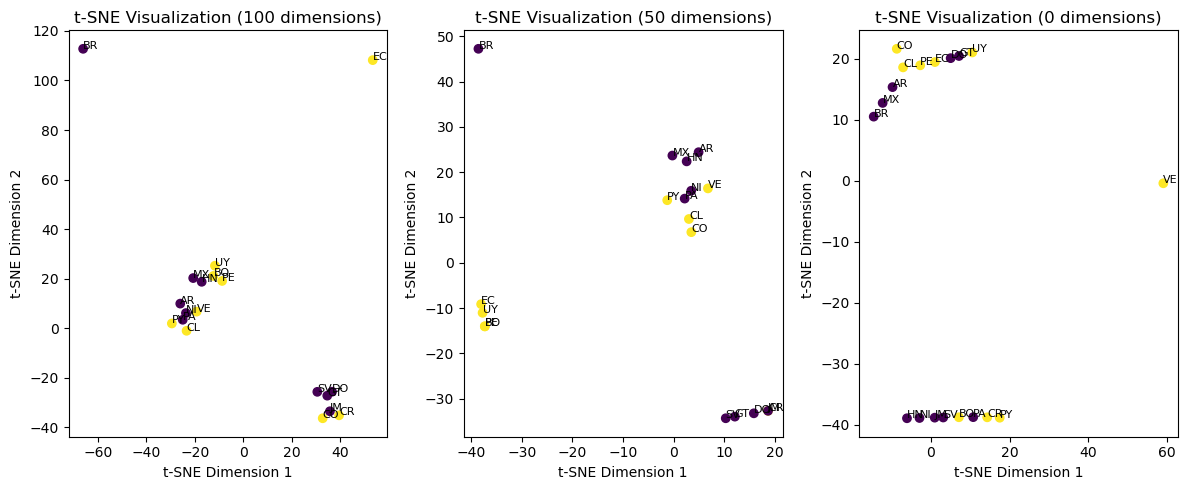

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Assuming you've already loaded clafdata_0_scaled, clafdata_50_scaled, and clafdata_100_scaled

# Function to apply t-SNE with labels
def apply_tsne_with_labels(df, target_column, label_column, perplexity, learning_rate):
    X = df.drop([target_column, label_column], axis=1)
    y = df[target_column]
    labels = df[label_column]

    # Applying t-SNE
    tsne = TSNE(n_components=2, perplexity=perplexity, learning_rate=learning_rate)
    tsne_result = tsne.fit_transform(X)

    # Creating a DataFrame for visualization
    tsne_df = pd.DataFrame(data=tsne_result, columns=['t-SNE Dimension 1', 't-SNE Dimension 2'])
    final_df = pd.concat([tsne_df, pd.DataFrame({target_column: y, label_column: labels})], axis=1)

    return final_df

# Apply t-SNE to clafdata_100_scaled
tsne_result_100 = apply_tsne_with_labels(clafdata_100_scaled, "MIEMBRO_FLAR", 'refAreaID', perplexity=1, learning_rate=9)

# Apply t-SNE to clafdata_50_scaled
tsne_result_50 = apply_tsne_with_labels(clafdata_50_scaled, "MIEMBRO_FLAR", 'refAreaID', perplexity=1, learning_rate=1)

# Apply t-SNE to clafdata_0_scaled
tsne_result_0 = apply_tsne_with_labels(clafdata_0_scaled, "MIEMBRO_FLAR", 'refAreaID', perplexity=1, learning_rate=1)

# Visualize t-SNE results with country labels
plt.figure(figsize=(12, 5))
plt.subplot(1, 3, 1)
plt.scatter(tsne_result_100['t-SNE Dimension 1'], tsne_result_100['t-SNE Dimension 2'],
            c=tsne_result_100['MIEMBRO_FLAR'], cmap='viridis')
plt.title('t-SNE Visualization (100 dimensions)')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
for i, label in enumerate(tsne_result_100['refAreaID']):
    plt.text(tsne_result_100['t-SNE Dimension 1'][i], tsne_result_100['t-SNE Dimension 2'][i], label, fontsize=8)

plt.subplot(1, 3, 2)
plt.scatter(tsne_result_50['t-SNE Dimension 1'], tsne_result_50['t-SNE Dimension 2'],
            c=tsne_result_50['MIEMBRO_FLAR'], cmap='viridis')
plt.title('t-SNE Visualization (50 dimensions)')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
for i, label in enumerate(tsne_result_50['refAreaID']):
    plt.text(tsne_result_50['t-SNE Dimension 1'][i], tsne_result_50['t-SNE Dimension 2'][i], label, fontsize=8)

plt.subplot(1, 3, 3)
plt.scatter(tsne_result_0['t-SNE Dimension 1'], tsne_result_0['t-SNE Dimension 2'],
            c=tsne_result_0['MIEMBRO_FLAR'], cmap='viridis')
plt.title('t-SNE Visualization (0 dimensions)')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
for i, label in enumerate(tsne_result_0['refAreaID']):
    plt.text(tsne_result_0['t-SNE Dimension 1'][i], tsne_result_0['t-SNE Dimension 2'][i], label, fontsize=8)

plt.tight_layout()
plt.show()


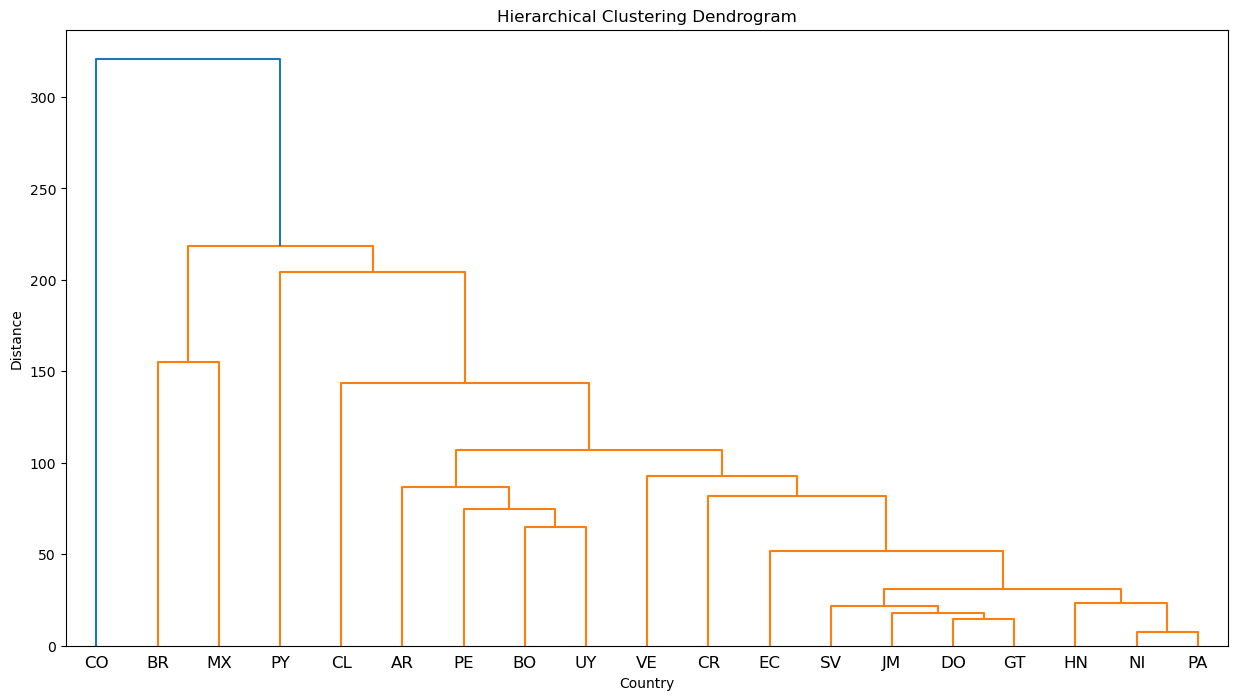

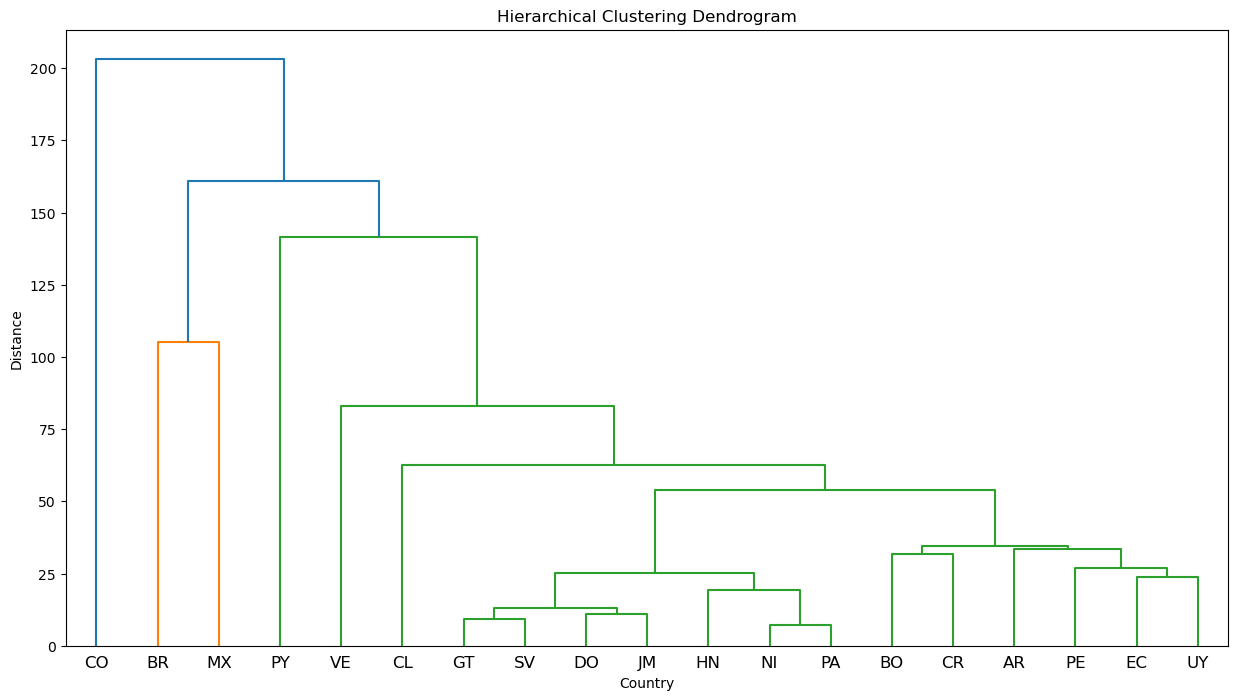

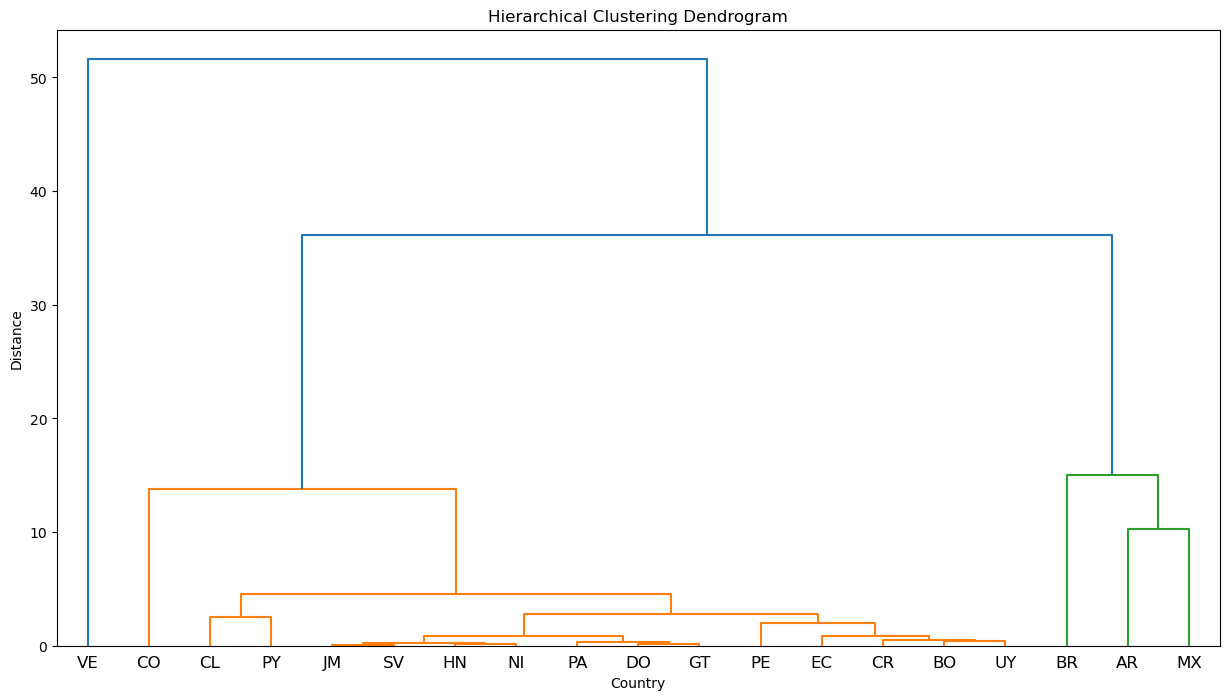

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Function to perform hierarchical clustering and visualize dendrogram with country labels
def hierarchical_clustering_dendrogram_with_labels(df, country_column='Country', method='ward'):
    # Select only numeric features
    numerical_features = df.select_dtypes(include=[np.number])

    # Handle missing and infinity values
    numerical_features.replace([np.inf, -np.inf], np.nan, inplace=True)
    numerical_features.dropna(inplace=True)

    # Calculate hierarchical linkage
    linkage_matrix = linkage(numerical_features, method=method)

    # Visualize dendrogram with country labels
    plt.figure(figsize=(15, 8))
    dendrogram(linkage_matrix, labels=df[country_column].tolist())
    plt.title('Hierarchical Clustering Dendrogram')
    plt.xlabel('Country')
    plt.ylabel('Distance')
    plt.show()

# Apply hierarchical clustering and visualize dendrogram for clafdata_100_scaled
hierarchical_clustering_dendrogram_with_labels(clafdata_100_scaled, country_column='refAreaID')

# Apply hierarchical clustering and visualize dendrogram for clafdata_50_scaled
hierarchical_clustering_dendrogram_with_labels(clafdata_50_scaled, country_column='refAreaID')

# Apply hierarchical clustering and visualize dendrogram for clafdata_0_scaled
hierarchical_clustering_dendrogram_with_labels(clafdata_0_scaled, country_column='refAreaID')


En terminos de T-SNE:

Las coordenadas proporcionadas representan la ubicación de los países en un espacio bidimensional después de aplicar una reducción de dimensionalidad (PCA o t-SNE). Estos valores no tienen una interpretación directa en términos de latitud y longitud geográfica, pero ofrecen información sobre la proximidad relativa de los países en función de las características seleccionadas.

A continuación, algunas observaciones generales sobre la distribución de los países en cada escala:

Escala 100:

(Escala 100, reduccion PCA) Brasil, Argenitina y Mexico, no participa ninguno.

Argentina (AR), Bolivia (BO), y Chile (CL) están relativamente cercanos entre sí.
Brasil (BR) está bastante alejado de los otros países.
Ecuador (EC) y Perú (PE) están cerca en el espacio.

Escala 50:

(Escala 50, reduccion PCA) Brasil, Argenitina y Mexico, no participa ninguno.

Argentina (AR) y Brasil (BR) están más separados en comparación con la escala 100.
Honduras (HN) y Nicaragua (NI) están más cercanos.

Escala 0:

(Escala 0, reduccion PCA) Brasil, Argenitina y Mexico, no participa ninguno.

Los países muestran una distribución diferente en comparación con las escalas 50 y 100.
Los países están dispersos en el espacio y no siguen un patrón claro.
Estas observaciones sugieren que la distribución de los países en el espacio bidimensional varía según la escala utilizada. Es posible que las diferencias en las escalas reflejen cambios en la importancia relativa de las características utilizadas en el análisis.

En terminios de PCA:

    
Aquí hay algunas observaciones sobre la distribución de los países en el espacio bidimensional después de aplicar PCA en diferentes escalas:

Escala 100:

(Escala 100, reduccion PCA) Brasil, Argenitina y mexico, no participa ninguno.

Argentina (AR), Bolivia (BO), y Chile (CL) están relativamente cercanos entre sí.
Brasil (BR) está bastante alejado de los otros países.
Ecuador (EC) y Perú (PE) están cercanos en el espacio.

Escala 50:

(Escala 50, reduccion PCA) Brasil, Argenitina y Mexico, no participa ninguno.

Argentina (AR) y Brasil (BR) están más separados en comparación con la escala 100.
Honduras (HN) y Nicaragua (NI) están más cercanos.

Escala 0:

Los países están distribuidos de manera más compacta y no siguen un patrón claro.
Brasil (BR) tiene una posición diferente en esta escala.

(Escala 0, reduccion PCA) Brasil, Argenitina y Mexico, no participa ninguno.

Estas observaciones indican que la distribución de los países en el espacio bidimensional cambia según la escala utilizada. Cada escala captura diferentes aspectos de la variabilidad en los datos. La interpretación de las coordenadas específicas puede depender del método exacto utilizado para el análisis de PCA y de las características seleccionadas. En general, las escalas más altas parecen capturar mejor las relaciones relativas entre los países en términos de las características consideradas.

Dendograma:

En un dendrograma, las ramas más cercanas indican una mayor similitud entre los elementos. Por lo tanto, si en la escala 0, México y Argentina están en ramas cercanas o se agrupan temprano en la formación del dendrograma, eso sugiere una mayor similitud entre ellos en términos de las características consideradas. No obstante pertenecen a otra rama junto a brasil y muy cercanos relativamente al resto en caracteristicas objeto de estudio. Ninguno de estos paises pertenece al Flar y ademas no participan a cualquier escala tanto en PCA como en T-SNE.

A escala 100 como 50, existe relacion muy cercana entre Brasil y Mexico, estando Argentina apartada, de modo que estria bien descubrir si existen mas similitudes entre Brasil y Mexico que entre Argentina y Mexico.

La relacion Mexico-Argentina demuestra este hecho, que ya de antemano todo apuntaba a una relacion plausible o justificable en base a otros estudios.